In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=16)
import os, glob
import random
import shutil
%matplotlib inline

In [42]:
def sample_2Dtiles(image, annotation,injection,ffdot,fns_save, tile_shape=(32,32), samples=10,case=False):
    
    if case:
        print('shifted the image')
        image=image[100:,100:]
    
    Ninj=injection.shape[0]
    nninj=1
    nnum=0 #samples-Ninj
    Nheight=int(image.shape[0]/tile_shape[0])
    Nwidth=int(image.shape[1]/tile_shape[1])
    print ('MaskInputShape',annotation.shape)
    maxInstance=0
    counts=0
    
    for i in range(Nheight):
        for j in range(Nwidth):
            im = image[tile_shape[0]*i:(i+1)*tile_shape[0],j*tile_shape[1]:(j+1)*tile_shape[1]]
            np.save('{}/im{}_{}_{}_{}'.format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j),im)
            
            injlist=[]
            injlist2=[]
            for inji in range(Ninj):
                if (injection[inji][0] in range(tile_shape[0]*i,(i+1)*tile_shape[0]) and injection[inji][1] in range(j*tile_shape[1],(j+1)*tile_shape[1])):
                    newf=injection[inji][0]-tile_shape[0]*i
                    newfdot=injection[inji][1]-j*tile_shape[1]
                    injlist.append([newf,newfdot])
                    injlist2.append([injection[inji][0],injection[inji][1]])
         
            np.savetxt("{}/injim{}_{}_{}_{}.txt".format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j), injlist, delimiter=" ", newline = "\n", fmt='%i')
            np.savetxt("{}/totinj{}_{}_{}_{}.txt".format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j), injlist2, delimiter=" ", newline = "\n", fmt='%i')


            
            test = annotation[tile_shape[0]*i:(i+1)*tile_shape[0],j*tile_shape[1]:(j+1)*tile_shape[1]]
            nclass=np.count_nonzero(np.unique(test))
            classname=np.unique(test)
            if nclass==0:
                mask=np.zeros((test.shape[0], test.shape[1],1),dtype=np.uint8)
                np.save('{}/mask{}_{}_{}_{}'.format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j),mask)
                if (mask.shape[2]>maxInstance):
                    maxInstance=mask.shape[2]
            else:
                mask=np.zeros((test.shape[0], test.shape[1],nclass),dtype=np.uint8)
                if classname[0]==0:
                    for n in range(nclass):
                        mask[test==classname[(n+1)],n]=1

                    np.save('{}/mask{}_{}_{}_{}'.format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j),mask)
                    if (mask.shape[2]>maxInstance):
                        maxInstance=mask.shape[2]
                else:
                    print ('it is not in order')

            counts+=1
    #now the rest of the image (edges)
    #check if the mask is zero for the rest ==> adding it not much difference (might cause wrong result in val) 
    # ==>not add
    resHT=image.shape[0]%tile_shape[0]
    resWT=image.shape[1]%tile_shape[1]        

    for j in range(Nwidth):
        i=Nheight
        testt = annotation[Nheight*tile_shape[1]:,j*tile_shape[1]:(j+1)*tile_shape[1]]
        nclasst=np.count_nonzero(np.unique(testt))
        if nclasst>0:
        
            im = image[-tile_shape[0]:,j*tile_shape[1]:(j+1)*tile_shape[1]]
            np.save('{}/im{}_{}_{}_{}'.format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j),im)

            injlist=[]
            injlist2=[]
            for inji in range(Ninj):
                if (injection[inji][0] in range(image.shape[0]-tile_shape[0],image.shape[0]) and injection[inji][1] in range(j*tile_shape[1],(j+1)*tile_shape[1])):
                    newf=injection[inji][0]-(image.shape[0]-tile_shape[0])
                    newfdot=injection[inji][1]-j*tile_shape[1]
                    injlist.append([newf,newfdot])
                    injlist2.append([injection[inji][0],injection[inji][1]])

            np.savetxt("{}/injim{}_{}_{}_{}.txt".format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j), injlist, delimiter=" ", newline = "\n", fmt='%i')
            np.savetxt("{}/totinj{}_{}_{}_{}.txt".format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j), injlist2, delimiter=" ", newline = "\n", fmt='%i')

            test = annotation[-tile_shape[0]:,j*tile_shape[1]:(j+1)*tile_shape[1]]
            nclass=np.count_nonzero(np.unique(test))
            classname=np.unique(test)
            if nclass==0:
                mask=np.zeros((test.shape[0], test.shape[1],1),dtype=np.uint8)
                np.save('{}/mask{}_{}_{}_{}'.format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j),mask)
                if (mask.shape[2]>maxInstance):
                    maxInstance=mask.shape[2]
            else:
                mask=np.zeros((test.shape[0], test.shape[1],nclass),dtype=np.uint8)
                if classname[0]==0:
                    for n in range(nclass):
                        mask[test==classname[(n+1)],n]=1

                    np.save('{}/mask{}_{}_{}_{}'.format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j),mask)
                    if (mask.shape[2]>maxInstance):
                        maxInstance=mask.shape[2]
                else:
                    print ('it is not in order')


            counts+=1
    
    for i in range(Nheight):
        j=Nwidth
        
        testt = annotation[tile_shape[0]*i:(i+1)*tile_shape[0],Nwidth*tile_shape[1]:]
        nclasst=np.count_nonzero(np.unique(testt))
        if nclasst>0:
        
            im = image[tile_shape[0]*i:(i+1)*tile_shape[0],-tile_shape[1]:]
            np.save('{}/im{}_{}_{}_{}'.format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j),im)

            injlist=[]
            injlist2=[]
            for inji in range(Ninj):
                if (injection[inji][0] in range(tile_shape[0]*i,(i+1)*tile_shape[0]) and injection[inji][1] in range(image.shape[1]-tile_shape[1],image.shape[1])):
                    newf=injection[inji][0]-(tile_shape[0]*i)
                    newfdot=injection[inji][1]-(image.shape[1]-tile_shape[1])
                    injlist.append([newf,newfdot])
                    injlist2.append([injection[inji][0],injection[inji][1]])

            np.savetxt("{}/injim{}_{}_{}_{}.txt".format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j), injlist, delimiter=" ", newline = "\n", fmt='%i')
            np.savetxt("{}/totinj{}_{}_{}_{}.txt".format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j), injlist2, delimiter=" ", newline = "\n", fmt='%i')



            test = annotation[tile_shape[0]*i:(i+1)*tile_shape[0],-tile_shape[1]:]
            nclass=np.count_nonzero(np.unique(test))
            classname=np.unique(test)
            if nclass==0:
                mask=np.zeros((test.shape[0], test.shape[1],1),dtype=np.uint8)
                np.save('{}/mask{}_{}_{}_{}'.format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j),mask)
                if (mask.shape[2]>maxInstance):
                    maxInstance=mask.shape[2]
            else:
                mask=np.zeros((test.shape[0], test.shape[1],nclass),dtype=np.uint8)
                if classname[0]==0:
                    for n in range(nclass):
                        mask[test==classname[(n+1)],n]=1

                    np.save('{}/mask{}_{}_{}_{}'.format(fns_save,ffdot.split(".")[0],ffdot.split(".")[1],i,j),mask)
                    if (mask.shape[2]>maxInstance):
                        maxInstance=mask.shape[2]
                else:
                    print ('it is not in order')

            counts+=1
           
    print("image {}.{} has {} tiels".format(ffdot.split(".")[0],ffdot.split(".")[1],counts-1))

In [43]:

mask=sorted(glob.glob(os.path.join('ImageMaskInjData/imageO1/mask/','*')))


Mean_img=12.162425 #from all the available dataset
Std_img=6.4210296 #from all the available dataset


In [44]:
fns_save='imageO1/'
PATCH_HEIGHT=PATCH_WIDTH=256 #512
Nsample=30
for nfile in range(len(mask)):
    
    f=mask[nfile].split("maskL_bin")[-1][:-4]
    print(f)
    
    
    train=sorted(glob.glob(os.path.join('ImageMaskInjData/imageO1/image/res_{}'.format(f),'all_LRes{}.t2*'.format(f,f))))
    inj=sorted(glob.glob(os.path.join('ImageMaskInjData/imageO1/injs/','sinj{}.txt'.format(f))))
    
    print (mask[nfile])
    print (train[0],inj[0])
    arrl=np.load(mask[nfile])
    arrl=arrl.astype(np.uint8)


    dft=pd.read_csv(train[0], sep='\s+', header=None, dtype={0: np.uint16, 1: np.uint16,2: np.float32 })
    dft=dft.sort_values(by=[0,1])
    dft.columns=['f', 'fdot','BSGLtL']
    dft=dft.replace(1e-5,np.random.uniform(low=0., high=0.00001))
    dft['BSGLtL']=(dft['BSGLtL']-Mean_img)/Std_img

    pivottrain=(dft.groupby(['f','fdot'])['BSGLtL'].max()).unstack()
    dft.drop(dft.index, inplace=True)
    

    pivottrain.index.name = None
    pivottrain.columns.name = None
    arrt=pivottrain.values
    arrt=arrt.reshape(arrt.shape[0], arrt.shape[1],1)

    data = np.loadtxt(fname=inj[0], delimiter=' ',dtype=np.uint16)
    data2=data.copy()
    Ninj=data.shape[0]
    flist=list((pivottrain.index.values))
    fdotlist=list((pivottrain.columns.values))

    for i in range (Ninj):
        x = data[i][0] #pick the injected pixcel in height (f) cluster
        y = data[i][1]
        xindex=flist.index(x)
        yindex=fdotlist.index(y)
        data2[i][0]=xindex
        data2[i][1]=yindex

    print ("here is data shape", (arrt.shape), (arrl.shape), (data.shape))
    sample_2Dtiles(arrt, arrl,data2,f,fns_save ,tile_shape=(PATCH_HEIGHT, PATCH_WIDTH), samples=Nsample, case=False)

20.00
ImageMaskInjData/imageO1/mask/maskL_bin20.00.npy
ImageMaskInjData/imageO1/image/res_20.00/all_LRes20.00.t2 ImageMaskInjData/imageO1/injs/sinj20.00.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 20.00 has 12 tiels
20.05
ImageMaskInjData/imageO1/mask/maskL_bin20.05.npy
ImageMaskInjData/imageO1/image/res_20.05/all_LRes20.05.t2 ImageMaskInjData/imageO1/injs/sinj20.05.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 20.05 has 12 tiels
20.10
ImageMaskInjData/imageO1/mask/maskL_bin20.10.npy
ImageMaskInjData/imageO1/image/res_20.10/all_LRes20.10.t2 ImageMaskInjData/imageO1/injs/sinj20.10.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 20.10 has 12 tiels
20.20
ImageMaskInjData/imageO1/mask/maskL_bin20.20.npy
ImageMaskInjData/imageO1/image/res_20.20/all_LRes20.20.t2 ImageMaskInjData/imageO1/injs/sinj20.20.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)


here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 24.55 has 12 tiels
24.80
ImageMaskInjData/imageO1/mask/maskL_bin24.80.npy
ImageMaskInjData/imageO1/image/res_24.80/all_LRes24.80.t2 ImageMaskInjData/imageO1/injs/sinj24.80.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 24.80 has 12 tiels
24.85
ImageMaskInjData/imageO1/mask/maskL_bin24.85.npy
ImageMaskInjData/imageO1/image/res_24.85/all_LRes24.85.t2 ImageMaskInjData/imageO1/injs/sinj24.85.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 24.85 has 12 tiels
25.10
ImageMaskInjData/imageO1/mask/maskL_bin25.10.npy
ImageMaskInjData/imageO1/image/res_25.10/all_LRes25.10.t2 ImageMaskInjData/imageO1/injs/sinj25.10.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 25.10 has 13 tiels
25.20
ImageMaskInjData/imageO1/mask/maskL_bin25.20.npy
ImageMaskInjData/imageO1/image/res_25.20/all_LRes2

here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 28.85 has 13 tiels
29.00
ImageMaskInjData/imageO1/mask/maskL_bin29.00.npy
ImageMaskInjData/imageO1/image/res_29.00/all_LRes29.00.t2 ImageMaskInjData/imageO1/injs/sinj29.00.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 29.00 has 11 tiels
29.10
ImageMaskInjData/imageO1/mask/maskL_bin29.10.npy
ImageMaskInjData/imageO1/image/res_29.10/all_LRes29.10.t2 ImageMaskInjData/imageO1/injs/sinj29.10.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 29.10 has 11 tiels
29.25
ImageMaskInjData/imageO1/mask/maskL_bin29.25.npy
ImageMaskInjData/imageO1/image/res_29.25/all_LRes29.25.t2 ImageMaskInjData/imageO1/injs/sinj29.25.txt
here is data shape (1512, 543, 1) (1512, 543) (10, 2)
MaskInputShape (1512, 543)
image 29.25 has 12 tiels
29.30
ImageMaskInjData/imageO1/mask/maskL_bin29.30.npy
ImageMaskInjData/imageO1/image/res_29.30/all_LRes2

image 52.70 has 13 tiels
52.75
ImageMaskInjData/imageO1/mask/maskL_bin52.75.npy
ImageMaskInjData/imageO1/image/res_52.75/all_LRes52.75.t2 ImageMaskInjData/imageO1/injs/sinj52.75.txt
here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 52.75 has 14 tiels
52.85
ImageMaskInjData/imageO1/mask/maskL_bin52.85.npy
ImageMaskInjData/imageO1/image/res_52.85/all_LRes52.85.t2 ImageMaskInjData/imageO1/injs/sinj52.85.txt
here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 52.85 has 14 tiels
53.15
ImageMaskInjData/imageO1/mask/maskL_bin53.15.npy
ImageMaskInjData/imageO1/image/res_53.15/all_LRes53.15.t2 ImageMaskInjData/imageO1/injs/sinj53.15.txt
here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 53.15 has 13 tiels
53.25
ImageMaskInjData/imageO1/mask/maskL_bin53.25.npy
ImageMaskInjData/imageO1/image/res_53.25/all_LRes53.25.t2 ImageMaskInjData/imageO1/injs/sinj53.25.txt
here is data shape (1512, 543

here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 91.75 has 13 tiels
91.85
ImageMaskInjData/imageO1/mask/maskL_bin91.85.npy
ImageMaskInjData/imageO1/image/res_91.85/all_LRes91.85.t2 ImageMaskInjData/imageO1/injs/sinj91.85.txt
here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 91.85 has 10 tiels
91.90
ImageMaskInjData/imageO1/mask/maskL_bin91.90.npy
ImageMaskInjData/imageO1/image/res_91.90/all_LRes91.90.t2 ImageMaskInjData/imageO1/injs/sinj91.90.txt
here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 91.90 has 14 tiels
92.00
ImageMaskInjData/imageO1/mask/maskL_bin92.00.npy
ImageMaskInjData/imageO1/image/res_92.00/all_LRes92.00.t2 ImageMaskInjData/imageO1/injs/sinj92.00.txt
here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 92.00 has 13 tiels
92.05
ImageMaskInjData/imageO1/mask/maskL_bin92.05.npy
ImageMaskInjData/imageO1/image/res_92.05/all_LRes9

image 94.60 has 12 tiels
94.70
ImageMaskInjData/imageO1/mask/maskL_bin94.70.npy
ImageMaskInjData/imageO1/image/res_94.70/all_LRes94.70.t2 ImageMaskInjData/imageO1/injs/sinj94.70.txt
here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 94.70 has 11 tiels
94.75
ImageMaskInjData/imageO1/mask/maskL_bin94.75.npy
ImageMaskInjData/imageO1/image/res_94.75/all_LRes94.75.t2 ImageMaskInjData/imageO1/injs/sinj94.75.txt
here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 94.75 has 16 tiels
94.90
ImageMaskInjData/imageO1/mask/maskL_bin94.90.npy
ImageMaskInjData/imageO1/image/res_94.90/all_LRes94.90.t2 ImageMaskInjData/imageO1/injs/sinj94.90.txt
here is data shape (1512, 543, 1) (1512, 543) (20, 2)
MaskInputShape (1512, 543)
image 94.90 has 12 tiels


imageL4/mask20_00_0_0.npy
(256, 256, 1)


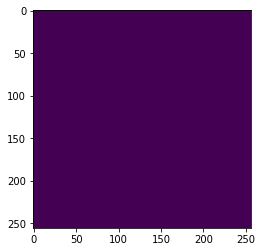

imageL4/mask20_00_0_1.npy
(256, 256, 2)


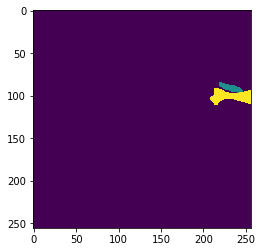

imageL4/mask20_00_0_2.npy
(256, 256, 2)


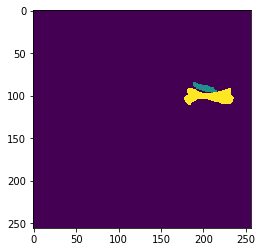

imageL4/mask20_00_1_0.npy
(256, 256, 1)


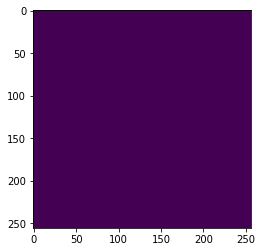

imageL4/mask20_00_1_1.npy
(256, 256, 2)


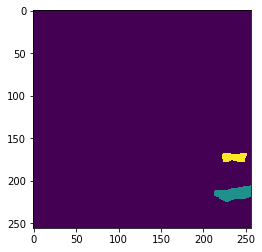

imageL4/mask20_00_1_2.npy
(256, 256, 2)


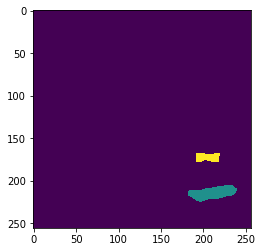

imageL4/mask20_00_2_0.npy
(256, 256, 1)


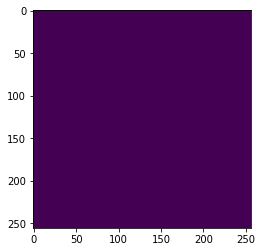

imageL4/mask20_00_2_1.npy
(256, 256, 1)


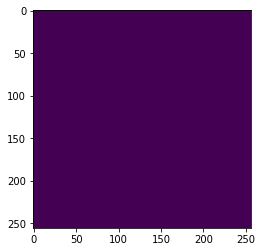

imageL4/mask20_00_3_0.npy
(256, 256, 1)


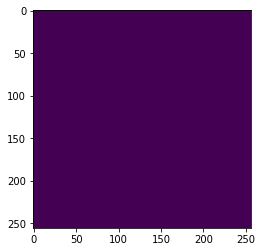

imageL4/mask20_00_3_1.npy
(256, 256, 1)


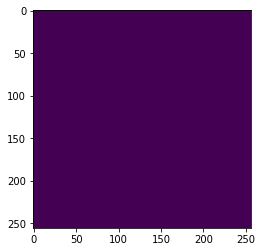

imageL4/mask20_00_4_0.npy
(256, 256, 1)


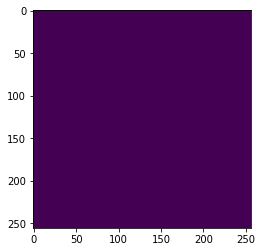

imageL4/mask20_00_4_1.npy
(256, 256, 2)


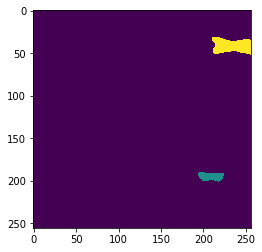

imageL4/mask20_00_4_2.npy
(256, 256, 2)


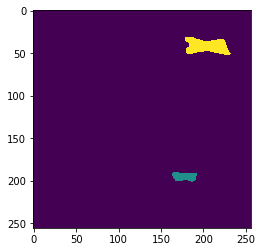

imageL4/mask20_05_0_0.npy
(256, 256, 1)


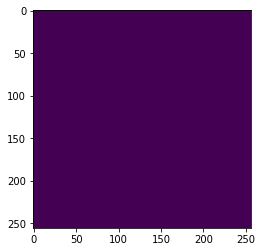

imageL4/mask20_05_0_1.npy
(256, 256, 1)


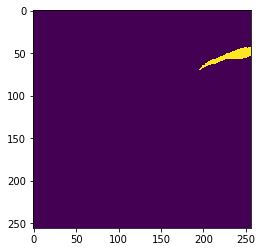

imageL4/mask20_05_0_2.npy
(256, 256, 1)


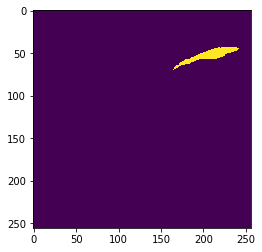

imageL4/mask20_05_1_0.npy
(256, 256, 1)


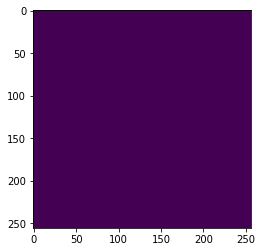

imageL4/mask20_05_1_1.npy
(256, 256, 1)


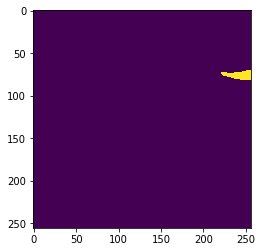

imageL4/mask20_05_1_2.npy
(256, 256, 1)


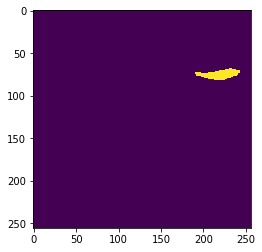

imageL4/mask20_05_2_0.npy
(256, 256, 1)


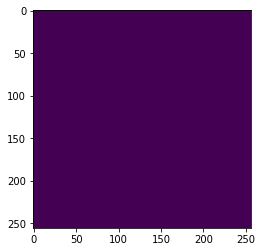

imageL4/mask20_05_2_1.npy
(256, 256, 2)


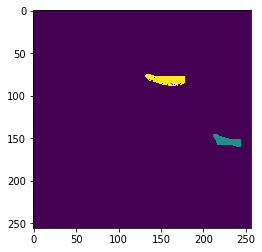

imageL4/mask20_05_3_0.npy
(256, 256, 1)


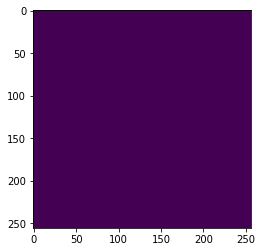

imageL4/mask20_05_3_1.npy
(256, 256, 1)


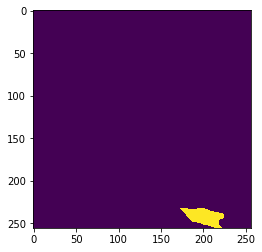

imageL4/mask20_05_4_0.npy
(256, 256, 1)


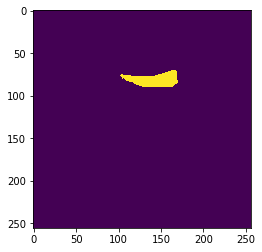

imageL4/mask20_05_4_1.npy
(256, 256, 1)


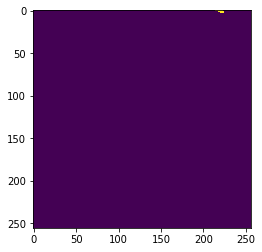

imageL4/mask20_05_5_1.npy
(256, 256, 1)


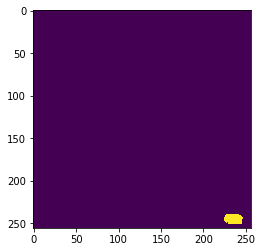

imageL4/mask20_10_0_0.npy
(256, 256, 1)


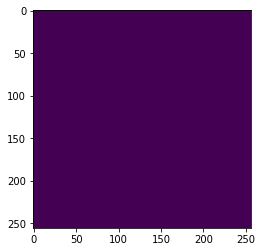

imageL4/mask20_10_0_1.npy
(256, 256, 1)


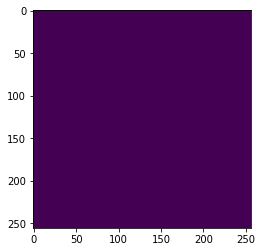

imageL4/mask20_10_1_0.npy
(256, 256, 1)


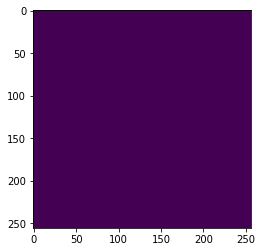

imageL4/mask20_10_1_1.npy
(256, 256, 1)


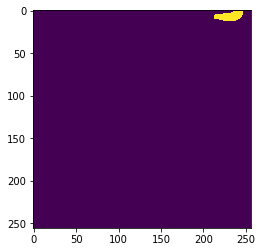

imageL4/mask20_10_2_0.npy
(256, 256, 1)


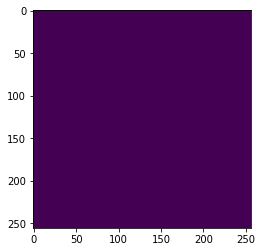

imageL4/mask20_10_2_1.npy
(256, 256, 2)


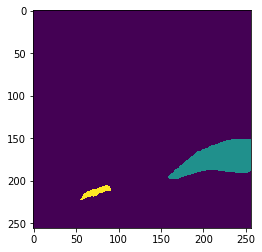

imageL4/mask20_10_2_2.npy
(256, 256, 2)


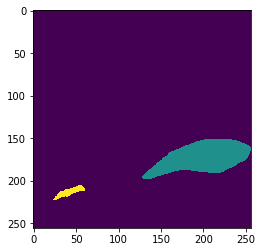

imageL4/mask20_10_3_0.npy
(256, 256, 1)


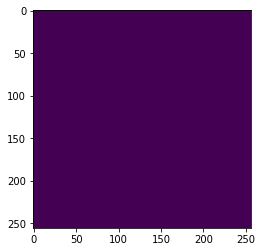

imageL4/mask20_10_3_1.npy
(256, 256, 1)


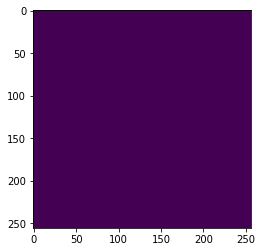

imageL4/mask20_10_4_0.npy
(256, 256, 1)


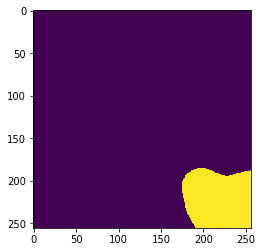

imageL4/mask20_10_4_1.npy
(256, 256, 1)


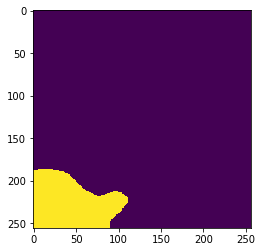

imageL4/mask20_10_5_0.npy
(256, 256, 1)


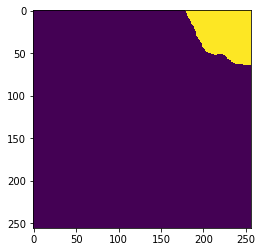

imageL4/mask20_10_5_1.npy
(256, 256, 1)


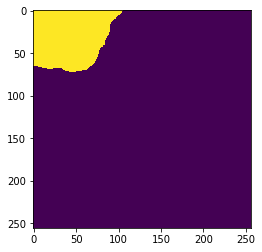

imageL4/mask20_20_0_0.npy
(256, 256, 1)


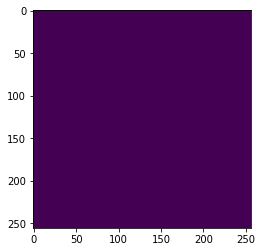

imageL4/mask20_20_0_1.npy
(256, 256, 1)


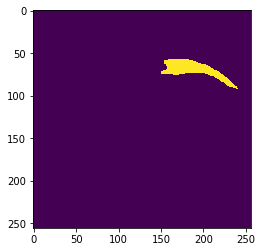

imageL4/mask20_20_1_0.npy
(256, 256, 1)


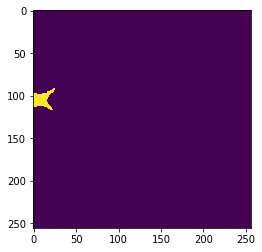

imageL4/mask20_20_1_1.npy
(256, 256, 1)


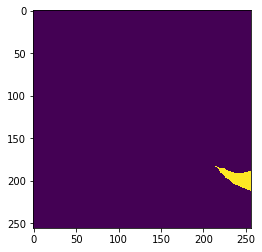

imageL4/mask20_20_1_2.npy
(256, 256, 1)


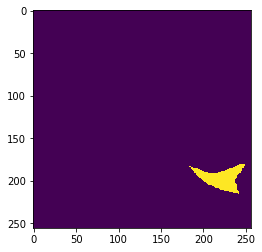

imageL4/mask20_20_2_0.npy
(256, 256, 1)


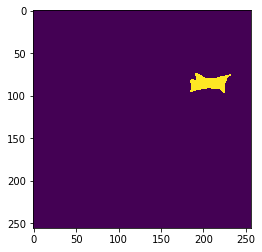

imageL4/mask20_20_2_1.npy
(256, 256, 1)


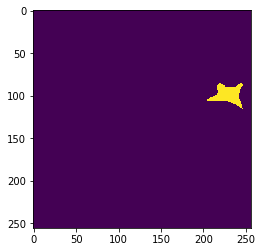

imageL4/mask20_20_3_0.npy
(256, 256, 1)


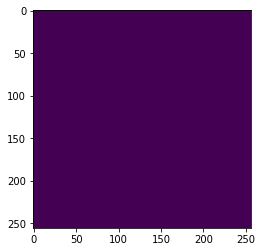

imageL4/mask20_20_3_1.npy
(256, 256, 1)


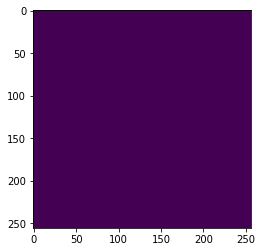

imageL4/mask20_20_4_0.npy
(256, 256, 1)


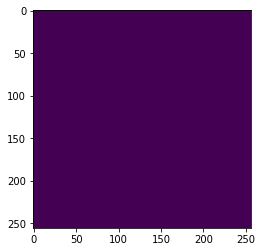

imageL4/mask20_20_4_1.npy
(256, 256, 1)


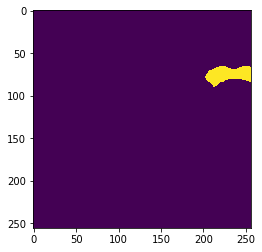

imageL4/mask20_20_4_2.npy
(256, 256, 1)


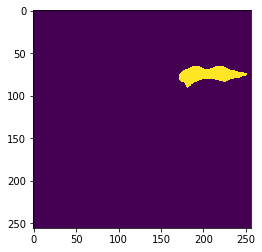

imageL4/mask20_25_0_0.npy
(256, 256, 1)


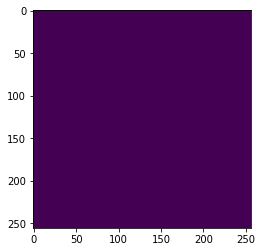

imageL4/mask20_25_0_1.npy
(256, 256, 1)


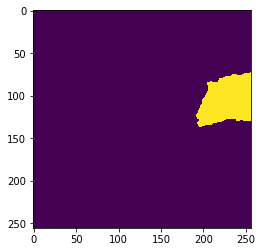

imageL4/mask20_25_0_2.npy
(256, 256, 1)


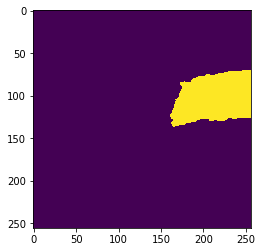

imageL4/mask20_25_1_0.npy
(256, 256, 1)


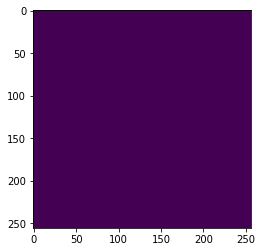

imageL4/mask20_25_1_1.npy
(256, 256, 1)


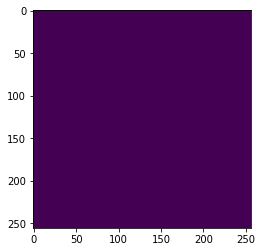

imageL4/mask20_25_2_0.npy
(256, 256, 1)


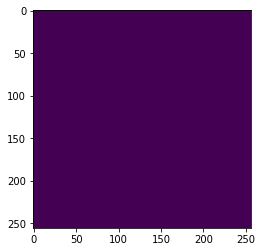

imageL4/mask20_25_2_1.npy
(256, 256, 1)


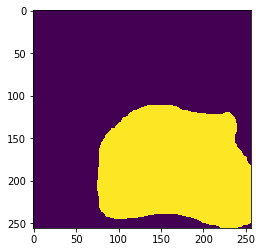

imageL4/mask20_25_2_2.npy
(256, 256, 1)


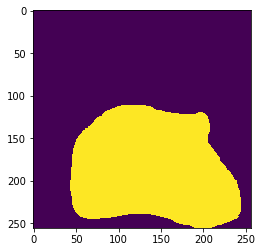

imageL4/mask20_25_3_0.npy
(256, 256, 1)


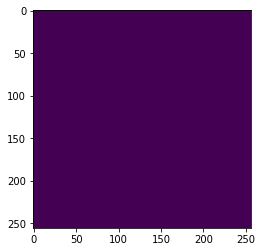

imageL4/mask20_25_3_1.npy
(256, 256, 2)


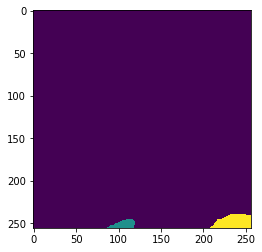

imageL4/mask20_25_3_2.npy
(256, 256, 2)


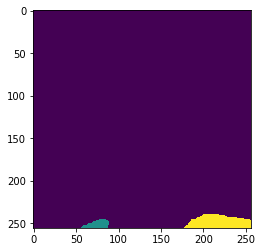

imageL4/mask20_25_4_0.npy
(256, 256, 1)


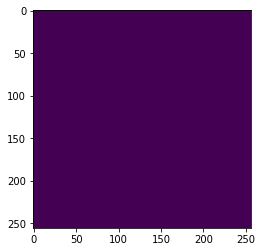

imageL4/mask20_25_4_1.npy
(256, 256, 4)


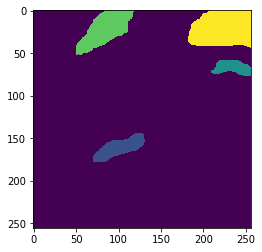

imageL4/mask20_25_4_2.npy
(256, 256, 4)


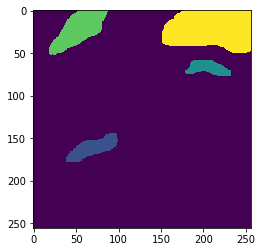

imageL4/mask20_25_5_1.npy
(256, 256, 2)


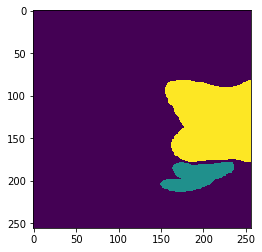

imageL4/mask20_35_0_0.npy
(256, 256, 1)


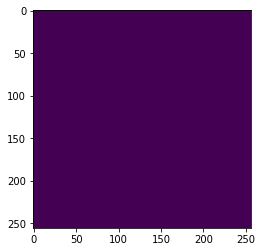

imageL4/mask20_35_0_1.npy
(256, 256, 1)


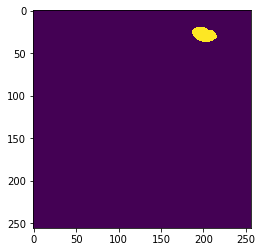

imageL4/mask20_35_1_0.npy
(256, 256, 1)


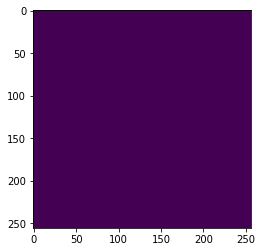

imageL4/mask20_35_1_1.npy
(256, 256, 1)


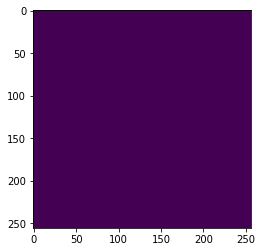

imageL4/mask20_35_2_0.npy
(256, 256, 1)


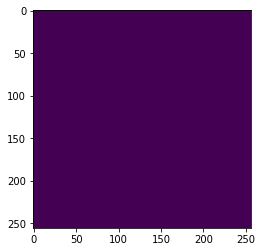

imageL4/mask20_35_2_1.npy
(256, 256, 2)


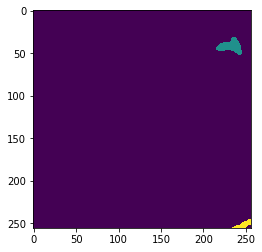

imageL4/mask20_35_2_2.npy
(256, 256, 2)


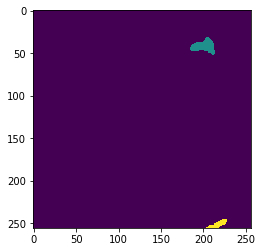

imageL4/mask20_35_3_0.npy
(256, 256, 1)


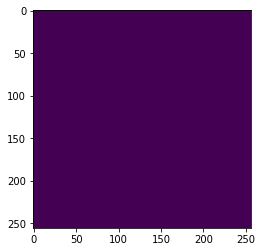

imageL4/mask20_35_3_1.npy
(256, 256, 2)


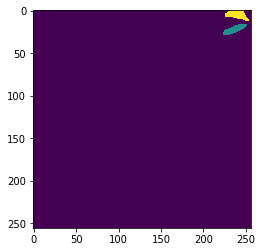

imageL4/mask20_35_4_0.npy
(256, 256, 1)


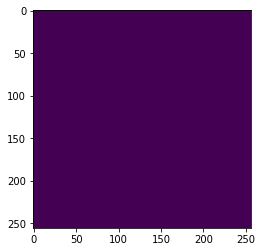

imageL4/mask20_35_4_1.npy
(256, 256, 1)


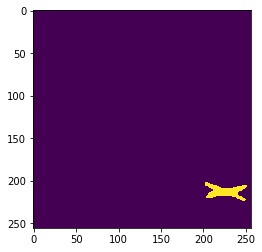

imageL4/mask20_35_5_0.npy
(256, 256, 1)


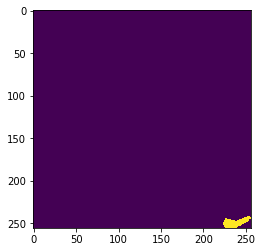

imageL4/mask20_35_5_1.npy
(256, 256, 2)


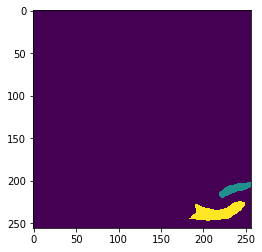

imageL4/mask20_45_0_0.npy
(256, 256, 1)


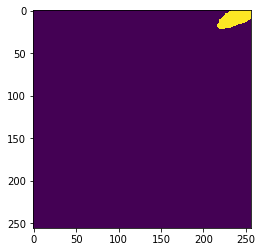

imageL4/mask20_45_0_1.npy
(256, 256, 4)


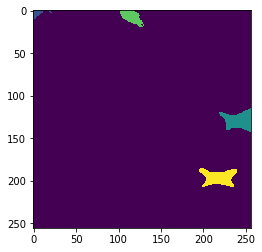

imageL4/mask20_45_0_2.npy
(256, 256, 3)


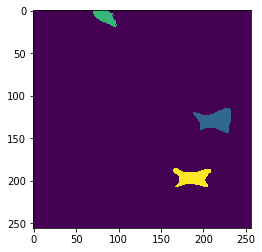

imageL4/mask20_45_1_0.npy
(256, 256, 1)


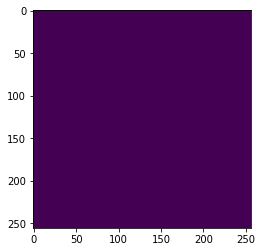

imageL4/mask20_45_1_1.npy
(256, 256, 1)


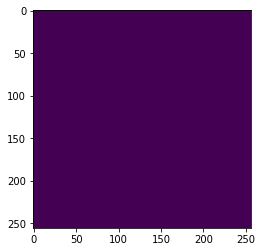

imageL4/mask20_45_2_0.npy
(256, 256, 1)


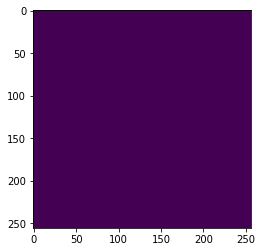

imageL4/mask20_45_2_1.npy
(256, 256, 1)


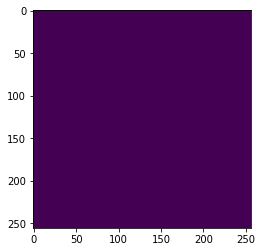

imageL4/mask20_45_3_0.npy
(256, 256, 1)


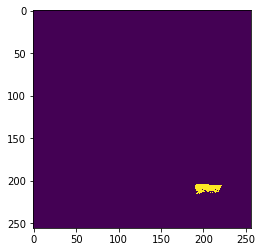

imageL4/mask20_45_3_1.npy
(256, 256, 1)


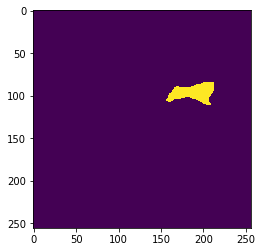

imageL4/mask20_45_4_0.npy
(256, 256, 1)


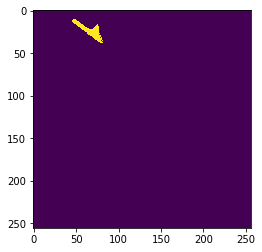

imageL4/mask20_45_4_1.npy
(256, 256, 1)


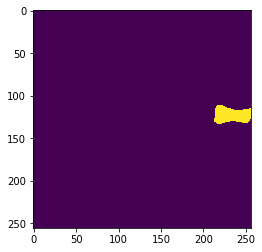

imageL4/mask20_45_4_2.npy
(256, 256, 1)


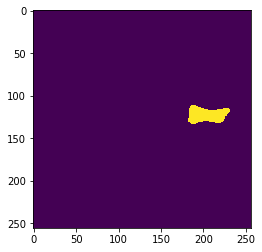

imageL4/mask20_45_5_0.npy
(256, 256, 1)


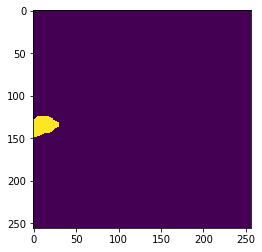

imageL4/mask20_45_5_1.npy
(256, 256, 1)


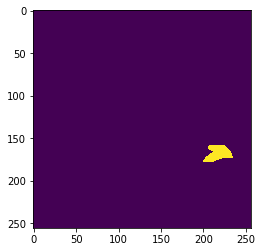

imageL4/mask20_50_0_0.npy
(256, 256, 1)


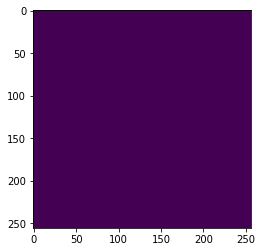

imageL4/mask20_50_0_1.npy
(256, 256, 2)


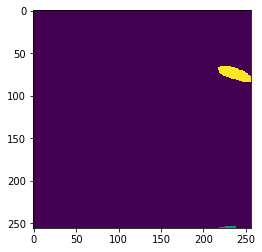

imageL4/mask20_50_0_2.npy
(256, 256, 2)


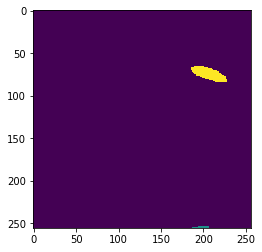

imageL4/mask20_50_1_0.npy
(256, 256, 1)


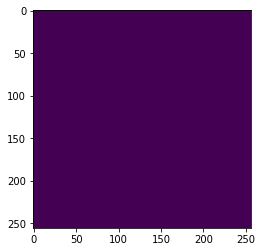

imageL4/mask20_50_1_1.npy
(256, 256, 1)


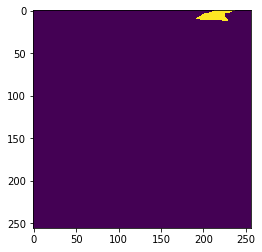

imageL4/mask20_50_2_0.npy
(256, 256, 1)


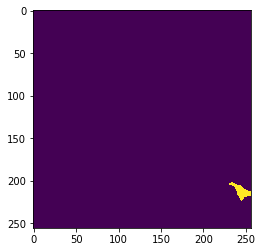

imageL4/mask20_50_2_1.npy
(256, 256, 2)


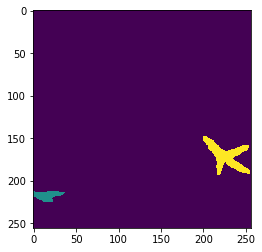

imageL4/mask20_50_3_0.npy
(256, 256, 1)


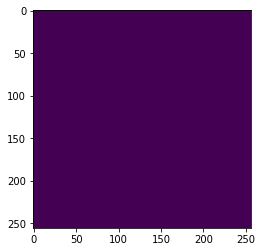

imageL4/mask20_50_3_1.npy
(256, 256, 1)


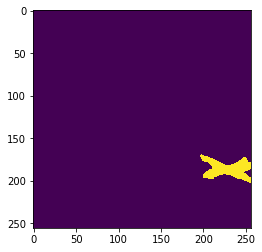

imageL4/mask20_50_3_2.npy
(256, 256, 1)


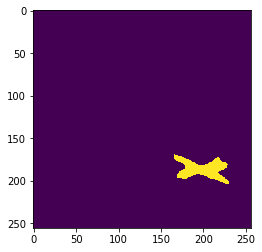

imageL4/mask20_50_4_0.npy
(256, 256, 1)


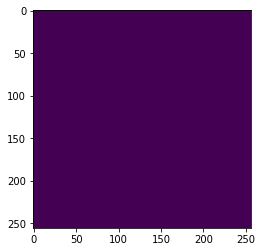

imageL4/mask20_50_4_1.npy
(256, 256, 1)


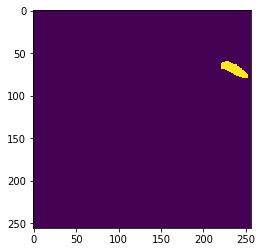

imageL4/mask20_65_0_0.npy
(256, 256, 1)


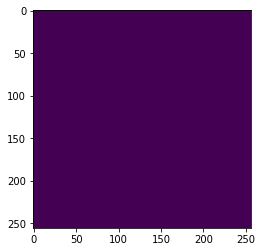

imageL4/mask20_65_0_1.npy
(256, 256, 1)


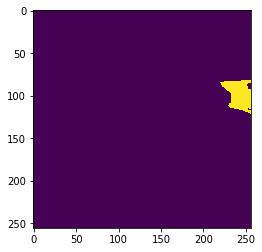

imageL4/mask20_65_0_2.npy
(256, 256, 1)


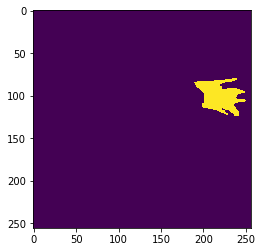

imageL4/mask20_65_1_0.npy
(256, 256, 1)


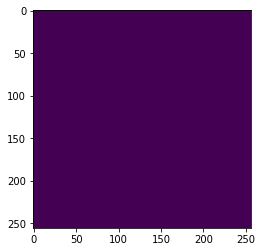

imageL4/mask20_65_1_1.npy
(256, 256, 1)


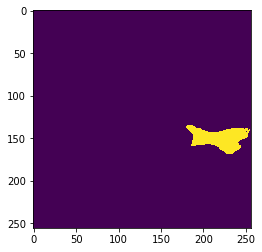

imageL4/mask20_65_2_0.npy
(256, 256, 1)


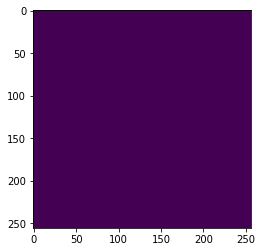

imageL4/mask20_65_2_1.npy
(256, 256, 2)


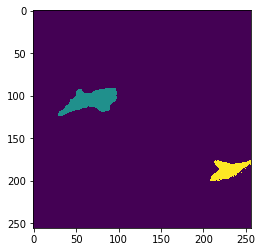

imageL4/mask20_65_2_2.npy
(256, 256, 2)


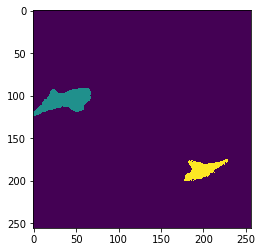

imageL4/mask20_65_3_0.npy
(256, 256, 1)


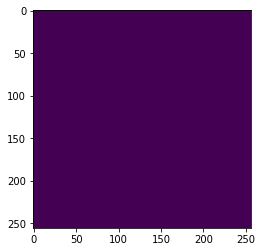

imageL4/mask20_65_3_1.npy
(256, 256, 2)


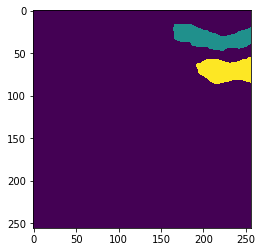

imageL4/mask20_65_3_2.npy
(256, 256, 2)


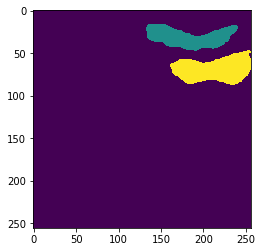

imageL4/mask20_65_4_0.npy
(256, 256, 1)


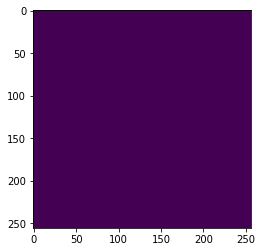

imageL4/mask20_65_4_1.npy
(256, 256, 2)


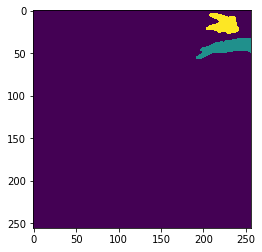

imageL4/mask20_65_4_2.npy
(256, 256, 2)


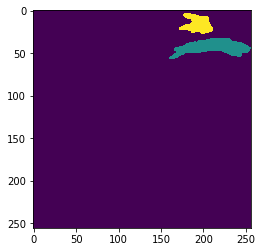

imageL4/mask20_65_5_1.npy
(256, 256, 2)


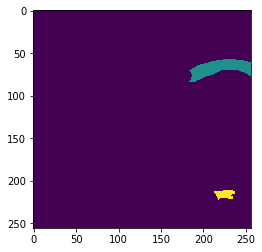

imageL4/mask20_75_0_0.npy
(256, 256, 1)


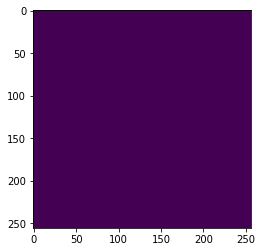

imageL4/mask20_75_0_1.npy
(256, 256, 1)


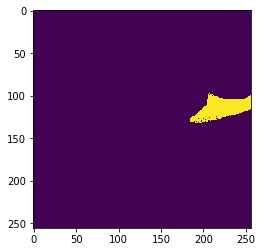

imageL4/mask20_75_0_2.npy
(256, 256, 1)


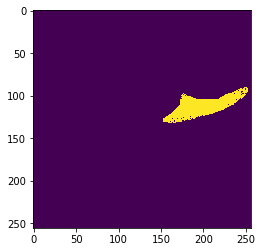

imageL4/mask20_75_1_0.npy
(256, 256, 1)


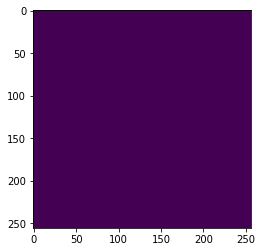

imageL4/mask20_75_1_1.npy
(256, 256, 1)


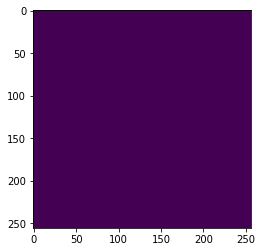

imageL4/mask20_75_2_0.npy
(256, 256, 1)


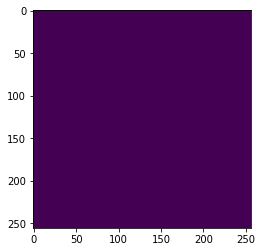

imageL4/mask20_75_2_1.npy
(256, 256, 1)


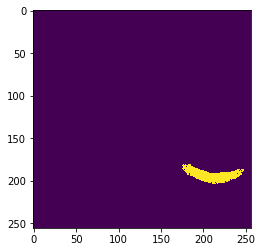

imageL4/mask20_75_3_0.npy
(256, 256, 1)


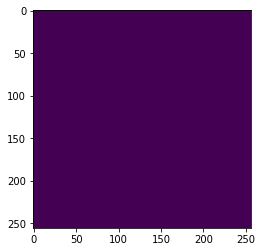

imageL4/mask20_75_3_1.npy
(256, 256, 3)


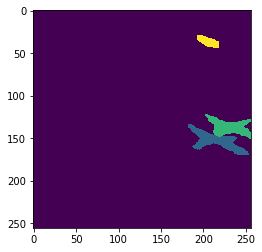

imageL4/mask20_75_3_2.npy
(256, 256, 3)


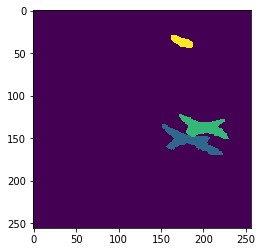

imageL4/mask20_75_4_0.npy
(256, 256, 1)


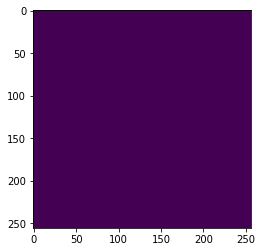

imageL4/mask20_75_4_1.npy
(256, 256, 3)


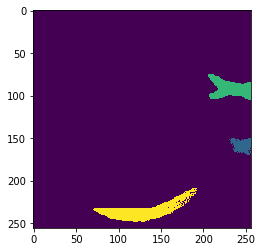

imageL4/mask20_75_4_2.npy
(256, 256, 3)


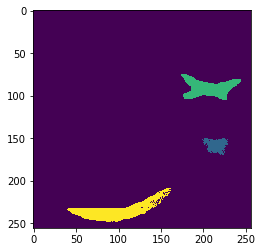

imageL4/mask20_80_0_0.npy
(256, 256, 1)


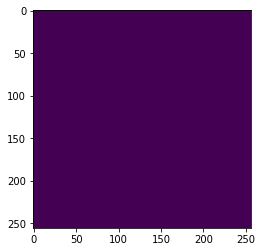

imageL4/mask20_80_0_1.npy
(256, 256, 2)


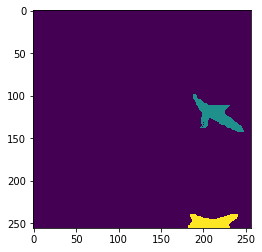

imageL4/mask20_80_1_0.npy
(256, 256, 1)


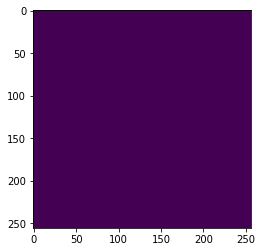

imageL4/mask20_80_1_1.npy
(256, 256, 2)


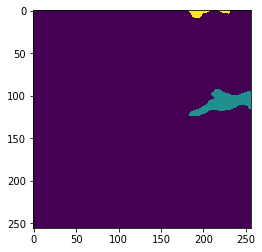

imageL4/mask20_80_1_2.npy
(256, 256, 2)


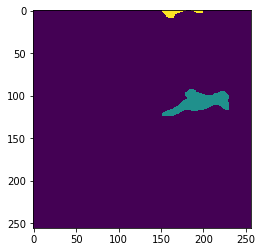

imageL4/mask20_80_2_0.npy
(256, 256, 1)


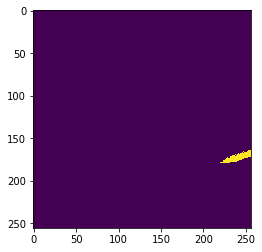

imageL4/mask20_80_2_1.npy
(256, 256, 2)


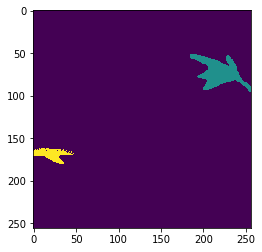

imageL4/mask20_80_2_2.npy
(256, 256, 2)


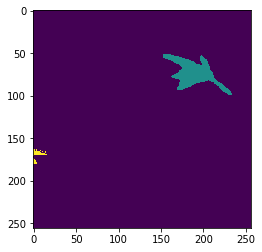

imageL4/mask20_80_3_0.npy
(256, 256, 1)


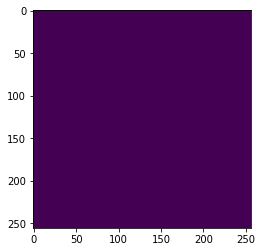

imageL4/mask20_80_3_1.npy
(256, 256, 1)


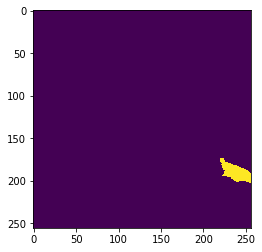

imageL4/mask20_80_3_2.npy
(256, 256, 1)


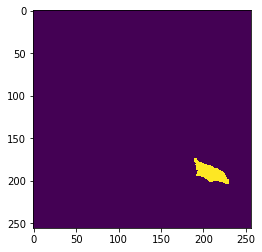

imageL4/mask20_80_4_0.npy
(256, 256, 1)


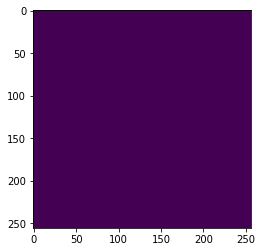

imageL4/mask20_80_4_1.npy
(256, 256, 1)


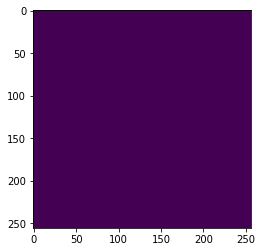

imageL4/mask20_80_5_1.npy
(256, 256, 2)


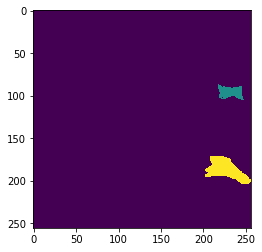

imageL4/mask21_05_0_0.npy
(256, 256, 1)


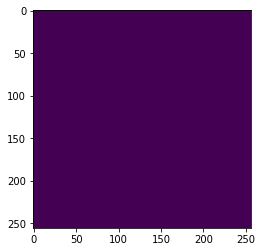

imageL4/mask21_05_0_1.npy
(256, 256, 1)


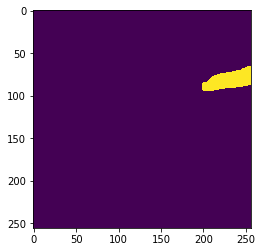

imageL4/mask21_05_0_2.npy
(256, 256, 1)


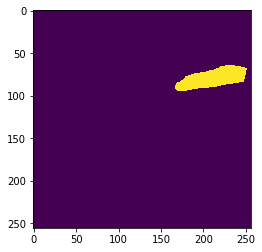

imageL4/mask21_05_1_0.npy
(256, 256, 1)


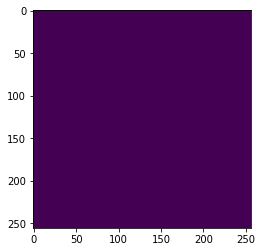

imageL4/mask21_05_1_1.npy
(256, 256, 1)


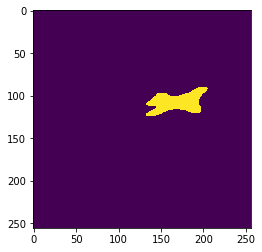

imageL4/mask21_05_2_0.npy
(256, 256, 1)


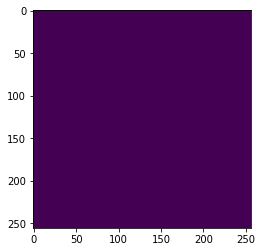

imageL4/mask21_05_2_1.npy
(256, 256, 1)


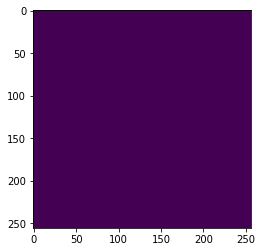

imageL4/mask21_05_3_0.npy
(256, 256, 1)


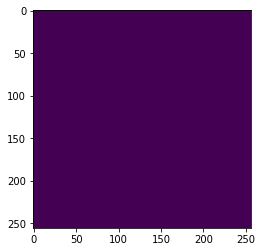

imageL4/mask21_05_3_1.npy
(256, 256, 2)


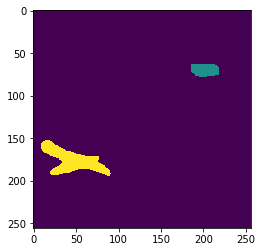

imageL4/mask21_05_4_0.npy
(256, 256, 1)


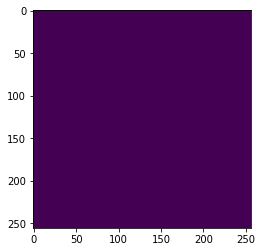

imageL4/mask21_05_4_1.npy
(256, 256, 1)


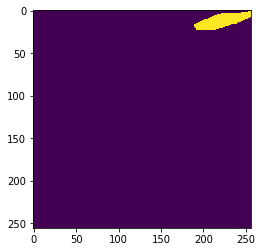

imageL4/mask21_05_4_2.npy
(256, 256, 1)


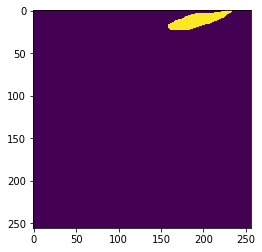

imageL4/mask21_30_0_0.npy
(256, 256, 1)


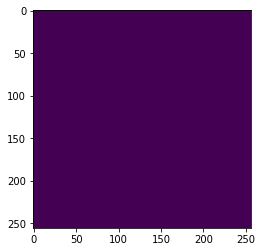

imageL4/mask21_30_0_1.npy
(256, 256, 3)


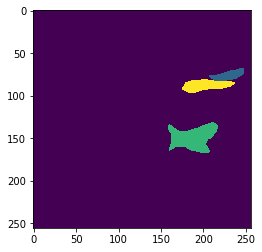

imageL4/mask21_30_1_0.npy
(256, 256, 1)


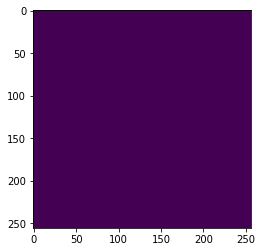

imageL4/mask21_30_1_1.npy
(256, 256, 1)


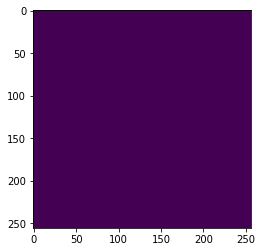

imageL4/mask21_30_2_0.npy
(256, 256, 1)


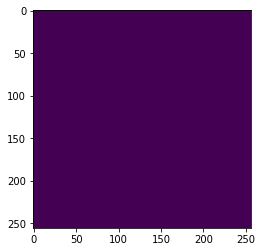

imageL4/mask21_30_2_1.npy
(256, 256, 1)


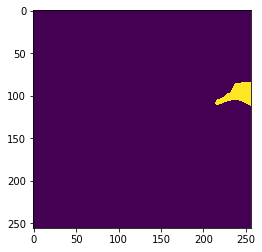

imageL4/mask21_30_2_2.npy
(256, 256, 1)


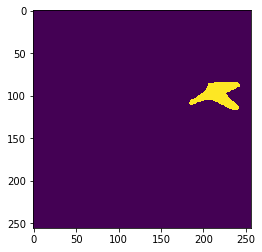

imageL4/mask21_30_3_0.npy
(256, 256, 1)


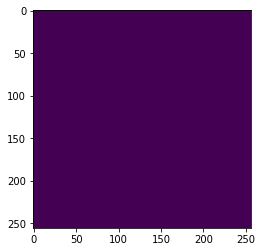

imageL4/mask21_30_3_1.npy
(256, 256, 1)


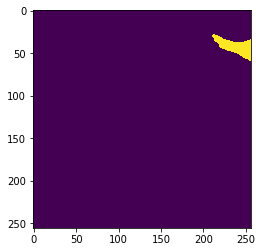

imageL4/mask21_30_3_2.npy
(256, 256, 1)


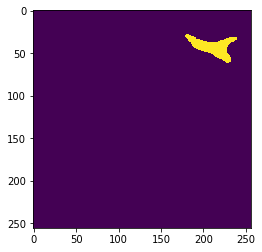

imageL4/mask21_30_4_0.npy
(256, 256, 1)


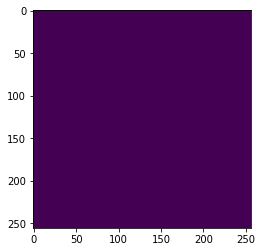

imageL4/mask21_30_4_1.npy
(256, 256, 2)


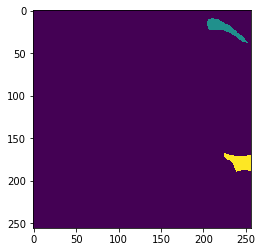

imageL4/mask21_30_4_2.npy
(256, 256, 2)


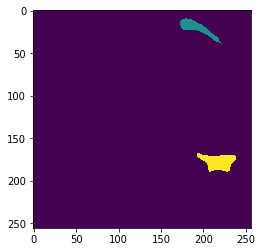

imageL4/mask21_30_5_0.npy
(256, 256, 1)


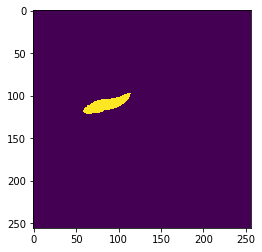

imageL4/mask21_50_0_0.npy
(256, 256, 1)


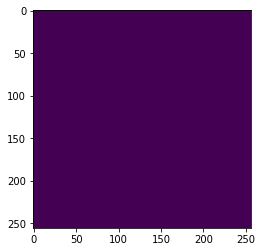

imageL4/mask21_50_0_1.npy
(256, 256, 1)


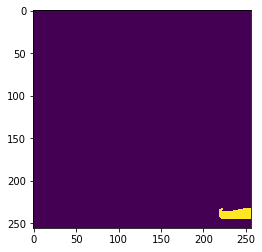

imageL4/mask21_50_0_2.npy
(256, 256, 1)


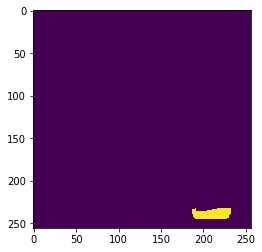

imageL4/mask21_50_1_0.npy
(256, 256, 1)


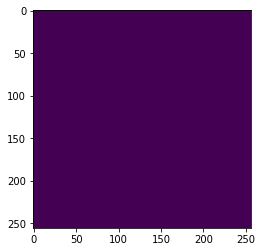

imageL4/mask21_50_1_1.npy
(256, 256, 1)


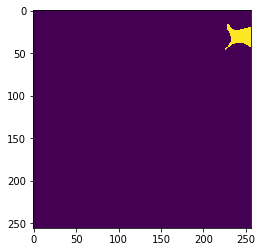

imageL4/mask21_50_1_2.npy
(256, 256, 1)


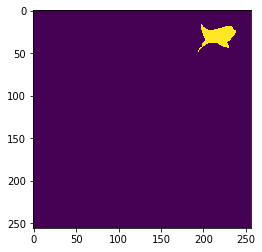

imageL4/mask21_50_2_0.npy
(256, 256, 1)


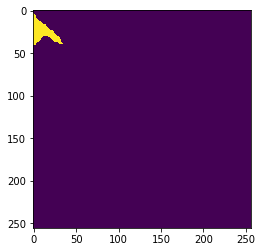

imageL4/mask21_50_2_1.npy
(256, 256, 1)


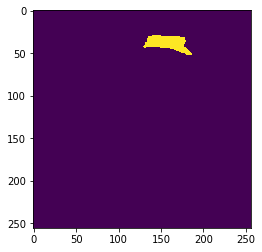

imageL4/mask21_50_3_0.npy
(256, 256, 1)


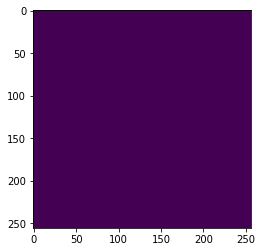

imageL4/mask21_50_3_1.npy
(256, 256, 1)


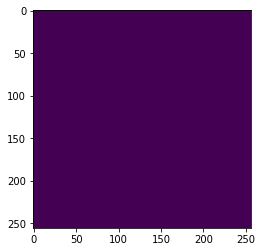

imageL4/mask21_50_4_0.npy
(256, 256, 1)


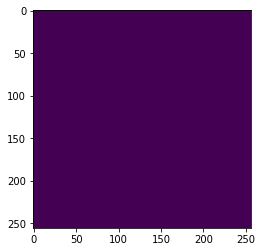

imageL4/mask21_50_4_1.npy
(256, 256, 2)


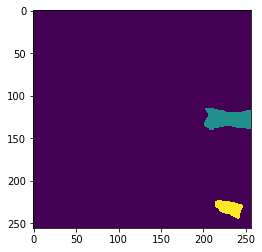

imageL4/mask21_50_4_2.npy
(256, 256, 2)


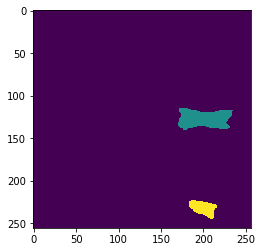

imageL4/mask21_50_5_1.npy
(256, 256, 3)


KeyboardInterrupt: 

In [24]:
#visualize some of the masks to understand the data

im=sorted(glob.glob(os.path.join('imageO1/','mask*')))
n=0
for i in range(len(im)):
    arrl=np.load(im[i])
    if(arrl.shape[2]>=1):
        ind=np.nonzero(arrl[:,:,0])
        n+=1
        print(im[i])
        print(arrl.shape)
        newarr=arrl
        for nn in range(1,arrl.shape[2]):
            for x in range(arrl.shape[0]):
                for y in range(arrl.shape[1]):
                    if (arrl[x,y,nn]>0):
                        newarr[x,y,0]=nn+1
        
        plt.imshow(arrl[:,:,0])
        plt.show()
        
print (n)        
        
        
        

In [ ]:
#Now to seperate the data into the three sets (train, val, test)

root='imageO1'

valPath="{}/val".format(root)
if not os.path.exists(valPath):
    os.mkdir(valPath)
    
    
trainPath="{}/train".format(root)
if not os.path.exists(trainPath):
    os.mkdir(trainPath)
    
testPath="{}/test".format(root)
if not os.path.exists(testPath):
    os.mkdir(testPath)
    
listf=["2","5","9"]
for lf in listf:
    im=sorted(glob.glob(os.path.join(root,'im{}*'.format(lf))))
    trainnum=int(len(im)*0.5)
    valnum=int(len(im)*0.24)
    testnum=len(im)-(trainnum+valnum)
    random.shuffle(im)
    trainS=random.sample(im,trainnum)
    for sample in trainS:
        #print(sample)
        ids=sample.split("/im")[1][:-4]
        shutil.move("{}".format(sample), "{}/im{}.npy".format(trainPath,ids))
        shutil.move("{}/mask{}.npy".format(root,ids), "{}/mask{}.npy".format(trainPath,ids))
        shutil.move("{}/totinj{}.txt".format(root,ids), "{}/totinj{}.txt".format(trainPath,ids))
        shutil.move("{}/injim{}.txt".format(root,ids), "{}/injim{}.txt".format(trainPath,ids))
    
    im2=[i for i in im if not i in trainS]
    valS=random.sample(im2,valnum)
    for sample in valS:
        ids=sample.split("/im")[1][:-4]
        shutil.move("{}".format(sample), "{}/im{}.npy".format(valPath,ids))
        shutil.move("{}/mask{}.npy".format(root,ids), "{}/mask{}.npy".format(valPath,ids))
        shutil.move("{}/totinj{}.txt".format(root,ids), "{}/totinj{}.txt".format(valPath,ids))
        shutil.move("{}/injim{}.txt".format(root,ids), "{}/injim{}.txt".format(valPath,ids))
        
    testS=[i for i in im if not i in (trainS+valS)]
    for sample in testS:
        ids=sample.split("/im")[1][:-4]
        shutil.move("{}".format(sample), "{}/im{}.npy".format(testPath,ids))
        shutil.move("{}/mask{}.npy".format(root,ids), "{}/mask{}.npy".format(testPath,ids))
        shutil.move("{}/totinj{}.txt".format(root,ids), "{}/totinj{}.txt".format(testPath,ids))
        shutil.move("{}/injim{}.txt".format(root,ids), "{}/injim{}.txt".format(testPath,ids))

imt=glob.glob(os.path.join(trainPath,'im*'))
imv=glob.glob(os.path.join(valPath,'im*'))
imtv=glob.glob(os.path.join(testPath,'im*'))
